In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-video-game-review-scores-from-gamespotcom/game_review_scores_feb_2023.csv


## Loading data, cleaning it, and exploring it

In [2]:
#Loading Data, clearing null values, examining datatypes
df = pd.read_csv("/kaggle/input/all-video-game-review-scores-from-gamespotcom/game_review_scores_feb_2023.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15351 entries, 0 to 15375
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           15351 non-null  object 
 1   score           15351 non-null  float64
 2   score_text      15351 non-null  object 
 3   platforms       15351 non-null  object 
 4   no_of_comments  15351 non-null  int64  
 5   no_of_upvotes   15351 non-null  int64  
 6   updated_on      15351 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 959.4+ KB


### Creating Datetime column to better manipulate around year of release

In [3]:
# Update 'updated_on' column from object to datetime
df['updated_on'] = pd.to_datetime(df['updated_on'])
df.head()

# Creating dataframe of 'good' games
df_good = df[df.score >=7]
#df_good
# Adding a year column to call to create new dataframe of games released in the HD era and before
df['year'] = pd.DatetimeIndex(df['updated_on']).year
df_hd = df[df.year >= 2005]
df_hd

df_sd = df[df.year < 2005]
df_sd

,title,score,score_text,platforms,no_of_comments,no_of_upvotes,updated_on,year
2,NFL 2K,9.9,Superb,DC,3,2,2000-04-28 20:26:00,2000
4,Tony Hawk's Pro Skater 2,9.9,Superb,DC,4,0,2000-11-07 17:57:00,2000
5,Tekken 3,9.9,Superb,PS,3,1092,1998-03-30 00:00:00,1998
6,Tony Hawk's Pro Skater 2,9.9,Superb,PS,1,13,2000-09-21 20:52:00,2000
7,Perfect Dark,9.9,Superb,N64,7,7,2000-05-22 17:43:00,2000
...,...,...,...,...,...,...,...,...
15365,Fox Sports Golf '99,1.4,Abysmal,PS,1,3,2000-04-28 23:05:00,2000
15367,Superman,1.3,Abysmal,N64,15,23,1999-06-08 12:16:00,1999
15369,Gods and Generals,1.2,Abysmal,PC,4,13,2003-03-18 14:31:00,2003
15370,Dragon Ball Z Ultimate Battle 22,1.2,Abysmal,PS,4,17,2003-03-25 16:12:00,2003


## Plotting Data

(array([  50.,  199.,  446.,  912., 1311., 2241., 3635., 3925., 2277.,
         355.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

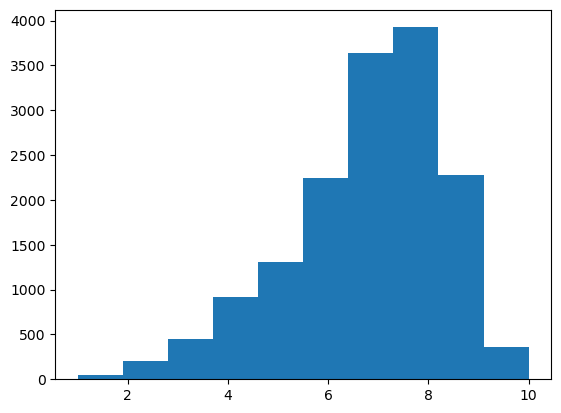

In [4]:
# Histogram of all game schools
plt.hist(df.score, bins=10)

(array([  20.,  138.,  304.,  614.,  813., 1522., 2478., 2707., 1396.,
         131.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

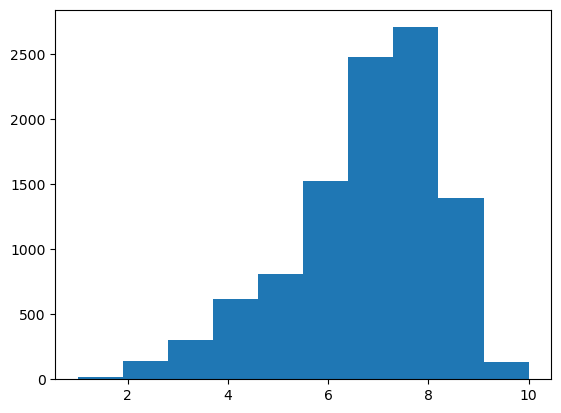

In [5]:
# histogram of game scores for games starting at 2005
plt.hist(df_hd['score'])

(array([  30.,   61.,  142.,  298.,  498.,  719., 1157., 1218.,  881.,
         224.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

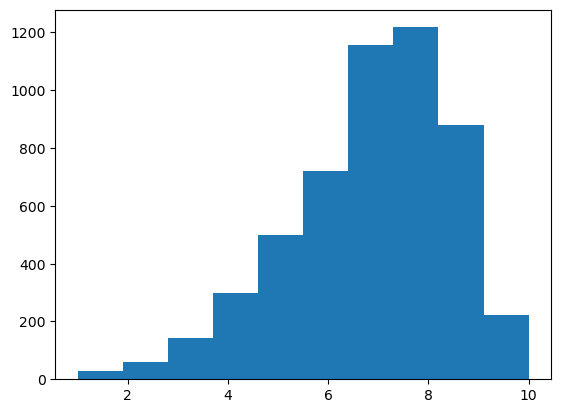

In [6]:
# histogram of game scores from before 2005
plt.hist(df_sd['score'])

### Reactions to histogram
Despite being split up by whether the game came out before hd consoles or after, it seems the overall distribution of scores from gamespot has stayed relatively consistant. Although, it does appear that a few more scores closer to 10 were given before 2005 than after, but also there appears to also be more badly reviewed games as well.

## Boxplot of scores per year

<AxesSubplot:xlabel='year', ylabel='score'>

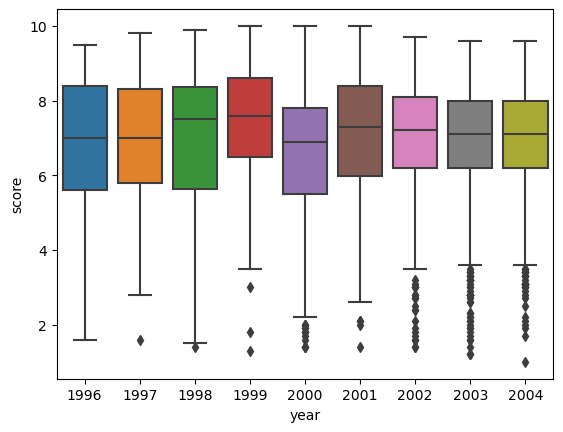

In [7]:
sns.boxplot(data = df_sd, x='year', y='score')

### Before 2005
Before 2005, it appears that the values given out were inconsistent compared year by year. the IQR varies and once gaming entered into the new millenium, there were more scores that were low-end outliers but also the lower quantile is higher comparatively to other years.

<AxesSubplot:xlabel='year', ylabel='score'>

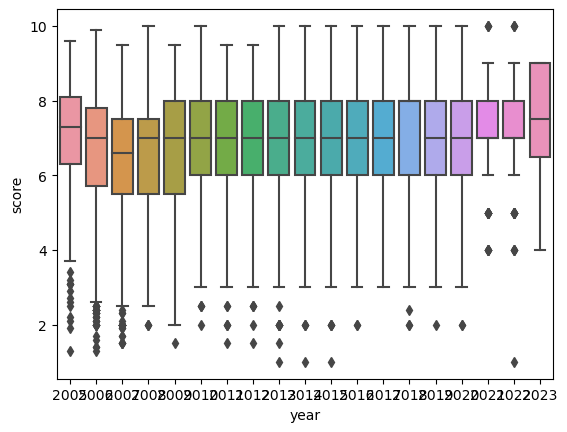

In [8]:
sns.boxplot(data = df_hd, x='year', y = 'score')

### After 2005
As can be seen, as we get closer to the modern era, the scores given out start to normalize. the upper and lower quantile starts to get conistant, mainly starting at 2010. Around 2020, things look a little abnormal and if context is removed, we'd think games were just better overall that year, but because of the pandemic, games that would be reviewed by a site like this weren't released.

## Feature Engineering for machine learning
Let's have some fun and see if we can fine-tune a regression model that can predict what scores will be based on numerical values. Due to the low dimensionality of this data and the subjective nature of gaming, I don't see this going well, but we're going to try a neural network to see if it can figure it out. Who knows, maybe the NN will see a pattern that I cannot.

### Adding columns and creating sets to be tested
I decided I wanted to see if the presence of which console the game releases on will affect the outcome of the prediction so I am creating two sets of data to be fed into the NN. The first set has the platforms column completely removed, while the second set has it converted into dummy data. This greatly increases the dimensionality so we'll see if this changes anything.

In [9]:
df['month'] = df['updated_on'].dt.month
df['day'] = df['updated_on'].dt.day
df_dropped = df.drop(columns=['title', "score_text", "updated_on"])
df_dummies = pd.get_dummies(df_dropped)
y = df['score']
X = df_dropped.drop(columns = ['score', 'platforms'])
X_dummies = df_dummies.drop(columns = 'score')
X
print(X.shape, X_dummies.shape, y.shape)
print(y)
print(X.info())

(15351, 5) (15351, 178) (15351,)
0        10.0
1        10.0
2         9.9
3         9.9
4         9.9
         ... 
15371     1.0
15372     1.0
15373     1.0
15374     1.0
15375     1.0
Name: score, Length: 15351, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15351 entries, 0 to 15375
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   no_of_comments  15351 non-null  int64
 1   no_of_upvotes   15351 non-null  int64
 2   year            15351 non-null  int64
 3   month           15351 non-null  int64
 4   day             15351 non-null  int64
dtypes: int64(5)
memory usage: 719.6 KB
None


In [10]:
# Loading in packages
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [11]:
# Creating training and testing sets for both dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_dummies, y, test_size=.25, random_state=42)

In [12]:
# creating model for data w/o platforms
model = Sequential()
model.add(Dense(500, input_dim=5, activation='relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
#model.summary()

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=35)

Epoch 1/35
360/360 [==============================] - 2s 3ms/step - loss: 257.9570 - mean_squared_error: 257.9570
Epoch 2/35
360/360 [==============================] - 1s 3ms/step - loss: 96.3638 - mean_squared_error: 96.3638
Epoch 3/35
360/360 [==============================] - 1s 3ms/step - loss: 134.2250 - mean_squared_error: 134.2250
Epoch 4/35
360/360 [==============================] - 1s 3ms/step - loss: 142.6609 - mean_squared_error: 142.6609
Epoch 5/35
360/360 [==============================] - 1s 3ms/step - loss: 22.6897 - mean_squared_error: 22.6897
Epoch 6/35
360/360 [==============================] - 1s 3ms/step - loss: 5.8569 - mean_squared_error: 5.8569
Epoch 7/35
360/360 [==============================] - 1s 3ms/step - loss: 7.0967 - mean_squared_error: 7.0967
Epoch 8/35
360/360 [==============================] - 1s 3ms/step - loss: 3.7295 - mean_squared_error: 3.7295
Epoch 9/35
360/360 [==============================] - 1s 4ms/step - loss: 4.7058 - mean_squared_error: 4

In [14]:
#predicting outcomes
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

360/360 [==============================] - 1s 2ms/step
1.6003183117727144
120/120 [==============================] - 0s 2ms/step
1.5828766954494422


### Results of first model
It appeas that the model can predict within 1.5 points the score of a game just based off the features we gave it.

### Creating Model for Dummy Data
Now, we will be making a model for the data with dummies created. I think this will create too much noise and won't be able to make accurate predictions.

In [15]:
model_dummy = Sequential()
model_dummy.add(Dense(500, input_dim=178, activation='relu'))
model_dummy.add(Dense(100, activation = 'relu'))
model_dummy.add(Dense(50, activation='relu'))
model_dummy.add(Dense(1))
model_dummy.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model_dummy.fit(X_train_dummy, y_train_dummy, epochs=35)

Epoch 1/35
360/360 [==============================] - 2s 4ms/step - loss: 154.2236 - mean_squared_error: 154.2236
Epoch 2/35
360/360 [==============================] - 2s 4ms/step - loss: 237.6613 - mean_squared_error: 237.6613
Epoch 3/35
360/360 [==============================] - 2s 4ms/step - loss: 92.0305 - mean_squared_error: 92.0305
Epoch 4/35
360/360 [==============================] - 2s 6ms/step - loss: 51.1834 - mean_squared_error: 51.1834
Epoch 5/35
360/360 [==============================] - 2s 4ms/step - loss: 29.9267 - mean_squared_error: 29.9267
Epoch 6/35
360/360 [==============================] - 1s 4ms/step - loss: 2.7416 - mean_squared_error: 2.7416
Epoch 7/35
360/360 [==============================] - 2s 4ms/step - loss: 2.5426 - mean_squared_error: 2.5426
Epoch 8/35
360/360 [==============================] - 2s 4ms/step - loss: 2.5818 - mean_squared_error: 2.5818
Epoch 9/35
360/360 [==============================] - 2s 4ms/step - loss: 2.5670 - mean_squared_error: 2.5

In [16]:
#predicting outcomes
pred_train_dummy = model_dummy.predict(X_train_dummy)
print(np.sqrt(mean_squared_error(y_train_dummy, pred_train_dummy)))

pred_dummy = model_dummy.predict(X_test_dummy)
print(np.sqrt(mean_squared_error(y_test_dummy, pred_dummy)))

360/360 [==============================] - 1s 2ms/step
1.5851785898451933
120/120 [==============================] - 0s 2ms/step
1.5545228925854144


### Conclusion
It appears the inclussion of console data does not make much of a difference for the neural network when it came to predicting review scores. Therefore, the model without the platforms is slightly better because it ran more efficiently and gave a similar output.